In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [2]:
df = pd.read_csv("data/virat.csv")

In [3]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [4]:
## Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        132 non-null    object
 1   Mins        132 non-null    object
 2   BF          132 non-null    int64 
 3   4s          132 non-null    int64 
 4   6s          132 non-null    int64 
 5   SR          132 non-null    object
 6   Pos         132 non-null    int64 
 7   Dismissal   132 non-null    object
 8   Inns        132 non-null    int64 
 9   Opposition  132 non-null    object
 10  Ground      132 non-null    object
 11  Start Date  132 non-null    object
dtypes: int64(5), object(7)
memory usage: 12.5+ KB


In [5]:
df['Runs'].value_counts()

0      10
2       5
9       4
31      4
37      4
       ..
136     1
127     1
86*     1
86      1
1*      1
Name: Runs, Length: 83, dtype: int64

In [6]:
df['Runs'] = df['Runs'].apply(lambda x: int(x.replace('*','')))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        132 non-null    int64 
 1   Mins        132 non-null    object
 2   BF          132 non-null    int64 
 3   4s          132 non-null    int64 
 4   6s          132 non-null    int64 
 5   SR          132 non-null    object
 6   Pos         132 non-null    int64 
 7   Dismissal   132 non-null    object
 8   Inns        132 non-null    int64 
 9   Opposition  132 non-null    object
 10  Ground      132 non-null    object
 11  Start Date  132 non-null    object
dtypes: int64(6), object(6)
memory usage: 12.5+ KB


In [8]:
print(df['Runs'].quantile(0.5) - df['Runs'].quantile(0.25))

22.5


In [9]:
df['Runs'].describe(percentiles = [0.25,0.5,1]) 

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
100%     154.000000
max      154.000000
Name: Runs, dtype: float64

#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


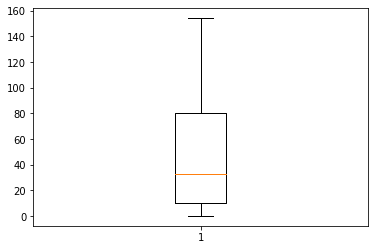

In [10]:
#Your code here
plt.boxplot(df['Runs']);plt.show()

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [11]:
## Your code here
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['year'] = df['Start Date'].dt.year 
df['year']

0      2008
1      2008
2      2008
3      2008
4      2008
       ... 
127    2016
128    2016
129    2017
130    2017
131    2017
Name: year, Length: 132, dtype: int64

In [12]:
df.groupby(by='year')['Runs'].count().sort_values(ascending=False)

year
2011    31
2013    23
2014    17
2010    16
2012    11
2015    10
2016    10
2009     6
2008     5
2017     3
Name: Runs, dtype: int64

In [13]:
df['year'].value_counts()

2011    31
2013    23
2014    17
2010    16
2012    11
2015    10
2016    10
2009     6
2008     5
2017     3
Name: year, dtype: int64

In [14]:
df.groupby(by='year')['Runs'].mean().sort_values(ascending=False)

year
2016    73.900000
2017    61.666667
2014    58.529412
2013    47.826087
2010    45.375000
2011    42.000000
2012    40.363636
2009    38.333333
2008    31.800000
2015    30.400000
Name: Runs, dtype: float64

In [15]:
df[['year','Runs']].sort_values(by='Runs', ascending=False)

,year,Runs
126,2016,154
108,2014,139
117,2015,138
96,2014,136
66,2012,128
...,...,...
75,2013,0
42,2011,0
68,2012,0
15,2010,0


In [16]:
df[['year','Runs']].sort_values(by='Runs', ascending=False)

,year,Runs
126,2016,154
108,2014,139
117,2015,138
96,2014,136
66,2012,128
...,...,...
75,2013,0
42,2011,0
68,2012,0
15,2010,0


In [17]:
pd.pivot_table(df,values='Runs',columns=['year'], aggfunc=[np.mean, np.max])

mean                                                                  \
year  2008       2009    2010  2011       2012       2013       2014  2015   
Runs  31.8  38.333333  45.375  42.0  40.363636  47.826087  58.529412  30.4   

                      amax                                               
year  2016       2017 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017  
Runs  73.9  61.666667   54  107  118  117  128  115  139  138  154  122

In [18]:
pd.pivot_table(df, values='Runs',columns=['year'], aggfunc=np.mean)

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Runs,31.8,38.333333,45.375,42.0,40.363636,47.826087,58.529412,30.4,73.9,61.666667


In [19]:
pd.pivot_table(df, values='Runs',columns=['year'], aggfunc=np.max)

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Runs,54,107,118,117,128,115,139,138,154,122


#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)All the bin ranges have the same frequency


In [20]:
df[df['Mins']=='-']

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,year
10,107,-,114,11,1,93.85,4,caught,2,v Sri Lanka,Kolkata,2009-12-24,2009
13,31,-,46,1,0,67.39,5,caught,1,v South Africa,Jaipur,2010-02-21,2010
14,57,-,71,4,1,80.28,3,caught,2,v South Africa,Ahmedabad,2010-02-27,2010
51,86,-,99,11,0,86.86,4,not out,2,v England,Mumbai,2011-10-23,2011
105,49,-,44,2,2,111.36,4,caught,2,v Sri Lanka,Ahmedabad,2014-11-06,2014
106,53,-,61,4,1,86.88,4,caught,2,v Sri Lanka,Hyderabad (Deccan),2014-11-09,2014


In [21]:
df = df[df['Mins']!='-']

In [22]:
df['Mins'] = df['Mins'].astype(int)

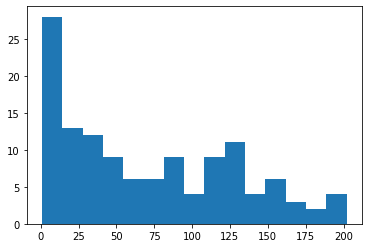

In [23]:
#Your code here
plt.hist(df['Mins'],bins=15)
plt.show()